# **Optimasi Efisiensi Penggunaan Transjakarta dalam Mengurangi Polusi Udara melalui Pendekatan Analisis RFM & Clustering K-Means**


## **Business Understanding**

TransJakarta, sistem bus rapid transit yang telah beroperasi sejak tahun 2004, menjadi fokus utama untuk mengurangi polusi udara. TransJakarta menawarkan alternatif yang ramah lingkungan dengan armada bus yang menggunakan bahan bakar yang lebih bersih dan efisien, serta rute yang mencakup sebagian besar wilayah perkotaan namun Transjakarta menghadapi tantangan dalam mengoptimalkan penggunaan armada dan rute-rute yang tersedia. Salah satu isu utama yang dihadapi adalah tingkat polusi udara yang tinggi di kota Jakarta.  

Menurut website resmi Kementerian Lingkungan Hidup dan Kehutanan, UNEP telah melaporkan bahwa sekitar 6,5 juta orang meninggal setiap tahunnya karena terpapar oleh kualitas udara yang buruk. Lebih lanjut, sebanyak 70% dari kematian akibat pencemaran udara terjadi di wilayah Asia Pasifik, termasuk Indonesia khususnya di Jakarta. Sektor transportasi di wilayah perkotaan diidentifikasi sebagai penyumbang utama pencemaran. Emisi dari kendaraan bermotor menjadi kontributor sebesar 70% terhadap pencemaran seperti Nitrogen Oksida (NOx), Karbon Monoksida (CO), Sulfur Dioksida (SO2), dan Partikulat (PM) (KHLK, 2021).

Dalam konteks ini, maka perlu dilakukan analisis untuk memahami perilaku penggunaan sistem transportasi publik Transjakarta dan menemukan cara untuk mengoptimalkan penggunaan armada serta rute-rute yang tersedia. Dengan menggunakan analisis data perjalanan pengguna Transjakarta, maka proyek ini akan mencari solusi untuk mengidentifikasi pola perjalanan yang paling sering dilakukan dan akan dilakukan promosi pada rute yang paling sering dilalui, dengan tujuan akhir yaitu dapat menurunkan tingkat polusi udara di kota Jakarta.


## **DATA UNDERSTANDING**

In [ ]:
#import Library yang digunakan untuk melakukan analisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import folium

In [ ]:
# ganti isi variable url sesuai dengan link dataset yang nanti mau diapakai
url = 'https://drive.google.com/file/d/18mde-26UYBkM_DMeOz1FQKyoTeeF0n2j/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

df = pd.read_csv(path)

In [ ]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [ ]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [ ]:
# Mengganti angka 0.0 dengan nilai null hanya pada kolom payAmount
#df['payAmount'] = df['payAmount'].replace(0.0, pd.NA)
#df_cleaned = df.dropna(subset=['payAmount'])
#df_cleaned

In [ ]:
#df_cleaned.isnull().sum()

In [ ]:
# Cek data na
df_droped = df.dropna()
df_droped.isnull().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

In [ ]:
df1 = df_droped

In [ ]:
# ubah kolom 'tapInTime' dan 'tapOutTime' dalam DataFrame df1 menjadi tipe data datetime
df1['tapInTime'] = pd.to_datetime(df1['tapInTime'])
df1['tapOutTime'] = pd.to_datetime(df1['tapOutTime'])


<ipython-input-8-93a9bc2605f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tapInTime'] = pd.to_datetime(df1['tapInTime'])
<ipython-input-8-93a9bc2605f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tapOutTime'] = pd.to_datetime(df1['tapOutTime'])


In [ ]:
df1['tapInHour'] = df1['tapInTime'].dt.hour # buat kolom baru bernama 'tapInHour' dalam DataFrame df1, yang berisi jam dari waktu masuk yang diekstraksi dari kolom 'tapInTime'
df1['tapOutHour'] = df1['tapOutTime'].dt.hour # buat kolom baru bernama 'tapOutHour' dalam DataFrame df1, yang berisi jam dari waktu keluar yang diekstraksi dari kolom 'tapOutTime'
df1['tapDay'] = df1['tapInTime'].dt.dayofweek # buat kolom baru bernama 'tapDay' dalam DataFrame df1, yang berisi hari dalam seminggu yang diekstraksi dari kolom 'tapInTime'
df1.head() # tampilkan lima baris pertama dari DataFrame df1 setelah transformasi yang dilakukan pada data

<ipython-input-9-3b53844f7685>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tapInHour'] = df1['tapInTime'].dt.hour # buat kolom baru bernama 'tapInHour' dalam DataFrame df1, yang berisi jam dari waktu masuk yang diekstraksi dari kolom 'tapInTime'
<ipython-input-9-3b53844f7685>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tapOutHour'] = df1['tapOutTime'].dt.hour # buat kolom baru bernama 'tapOutHour' dalam DataFrame df1, yang berisi jam dari waktu keluar yang diekstraksi dari kolom 'tapOutT

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,0


In [ ]:
# ganti nilai numerik dalam kolom 'tapDay' dengan nama hari dalam seminggu.
df1['tapDay'] = df1['tapDay'].replace({0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'})
df1.head()


<ipython-input-10-aa07e5097c84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tapDay'] = df1['tapDay'].replace({0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'})


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,Monday
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,Monday
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,Monday
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,Monday


In [ ]:
# buat DataFrame baru yang hanya berisi kolom-kolom 'payCardName', 'payCardBirthDate', 'payCardBank', dan 'payCardSex' dari DataFrame df1.
customer = df1[['payCardName', 'payCardBirthDate', 'payCardBank', 'payCardSex']]
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31730 entries, 0 to 37899
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   payCardName       31730 non-null  object
 1   payCardBirthDate  31730 non-null  int64 
 2   payCardBank       31730 non-null  object
 3   payCardSex        31730 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
# lakukan penghilangan duplikasi pada data berdasarkan nama pengguna
customer = customer.drop_duplicates(subset='payCardName', keep='first', ignore_index=True)
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   payCardName       1917 non-null   object
 1   payCardBirthDate  1917 non-null   int64 
 2   payCardBank       1917 non-null   object
 3   payCardSex        1917 non-null   object
dtypes: int64(1), object(3)
memory usage: 60.0+ KB


In [ ]:
# tambahkan kolom baru bernama 'age' ke dalam DataFrame customer
customer['age'] = 2023 - customer['payCardBirthDate']
customer.head()

# hitung jumlah pelanggan berdasarkan bank kartu pembayaran yang digunakan
cust_bank = customer['payCardBank'].value_counts().reset_index()
cust_bank.columns = ['Bank', 'Count']
cust_bank.head()
customer.head()

,payCardName,payCardBirthDate,payCardBank,payCardSex,age
0,Bajragin Usada,2008,emoney,M,15
1,Gandi Widodo,1997,dki,F,26
2,Emong Wastuti,1992,dki,F,31
3,Surya Wacana,1978,flazz,F,45
4,Embuh Mardhiyah,1982,flazz,M,41


### **Bank Distributions**

In [ ]:
# hitung jumlah pelanggan berdasarkan bank kartu pembayaran yang digunakan
cust_bank = customer['payCardBank'].value_counts().reset_index()
cust_bank.columns = ['Bank', 'Count']
cust_bank.head()

,Bank,Count
0,dki,945
1,emoney,361
2,flazz,163
3,brizzi,156
4,bni,148


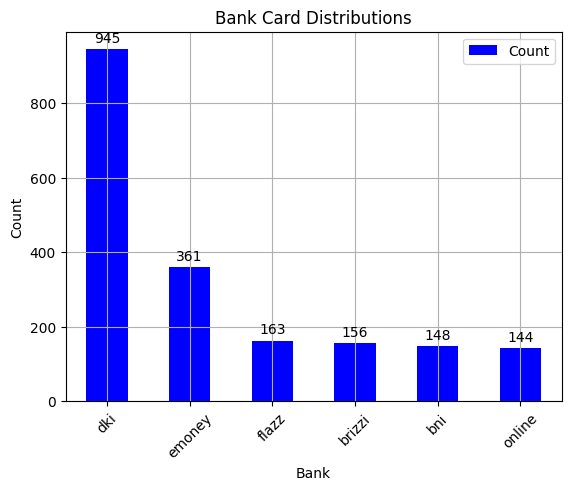

In [ ]:
ax = cust_bank.plot(x='Bank', y='Count', kind='bar', color='blue')
# Menambahkan teks di atas setiap bar
for i, v in enumerate(cust_bank['Count']):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')

plt.grid()
plt.xlabel('Bank')
plt.ylabel('Count')
plt.title('Bank Card Distributions')
plt.xticks(rotation=45)
plt.show()

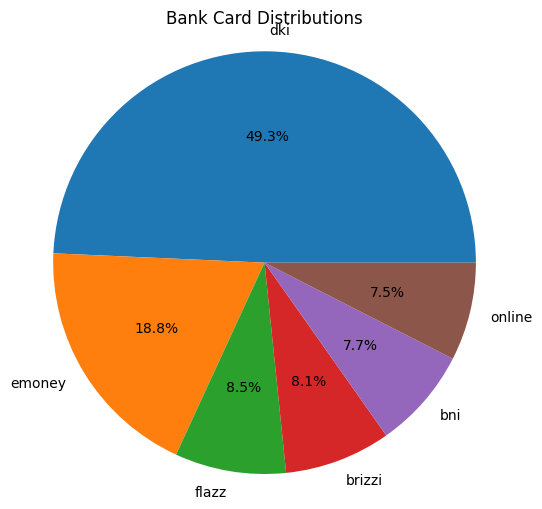

In [ ]:
plt.figure(figsize=(6, 6))  # Ukuran pie chart
plt.pie(cust_bank['Count'], labels=cust_bank['Bank'], autopct='%1.1f%%')
plt.axis('equal')  # Untuk memastikan pie chart menjadi lingkaran
plt.title('Bank Card Distributions')
plt.show()

### **Age Distribution**

In [ ]:
customer.head()

,payCardName,payCardBirthDate,payCardBank,payCardSex,age
0,Bajragin Usada,2008,emoney,M,15
1,Gandi Widodo,1997,dki,F,26
2,Emong Wastuti,1992,dki,F,31
3,Surya Wacana,1978,flazz,F,45
4,Embuh Mardhiyah,1982,flazz,M,41


In [ ]:
# hitung jumlah pelanggan berdasarkan umur
cust_age = customer[['payCardName', 'age']].groupby('age').size().reset_index(name='count')
cust_age

,age,count
0,11,37
1,12,36
2,13,39
3,14,34
4,15,46
...,...,...
61,72,4
62,74,2
63,75,3
64,76,2


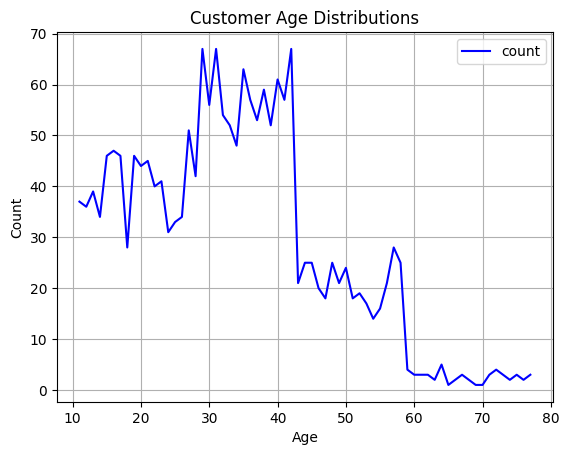

In [ ]:
ax = cust_age.plot(x='age', kind='line', color='blue')
plt.grid()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Customer Age Distributions')
plt.show()

In [ ]:
# hitung jumlah pelanggan berdasarkan jenis kelamin dan umur
cust_sex = customer.groupby(['payCardSex', 'age'])['payCardName'].count().reset_index(name='count').sort_values(by='count', ascending=False)
cust_sex.groupby('payCardSex').size()

payCardSex
F    55
M    64
dtype: int64

### **Traffic analysis**

In [ ]:
# hitung durasi perjalanan ('tripDuration') untuk setiap perjalanan
df1['tapInHour'] = df1['tapInTime'].dt.hour
df1['tapOutHour'] = df1['tapOutTime'].dt.hour
df1['tapOutHour'] = df1['tapOutHour'].replace(0, 24) # ganti nilai jam 0 dengan 24
df1['tripDuration'] = df1['tapOutHour'] - df1['tapInHour'] # hitung durasi perjalanan ('tripDuration') dengan mengurangkan jam keluar dari jam masuk.
df1.head()

<ipython-input-21-e3dcd3cab478>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tapInHour'] = df1['tapInTime'].dt.hour
<ipython-input-21-e3dcd3cab478>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tapOutHour'] = df1['tapOutTime'].dt.hour
<ipython-input-21-e3dcd3cab478>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay,tripDuration
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,1
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,Monday,1
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,Monday,1
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,Monday,1
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,Monday,0


In [ ]:
df1.dropna(subset=['tripDuration'], inplace=True) # hapus nilai NaN dari DataFrame df1 dan pertahankan nilai yang valid
df1.tripDuration.unique() # periksa nilai unik dari kolom 'tripDuration'

<ipython-input-22-b84ff9c734dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['tripDuration'], inplace=True) # hapus nilai NaN dari DataFrame df1 dan pertahankan nilai yang valid


array([1, 0, 2, 3], dtype=int32)

### **Trip Duration**

In [ ]:
# tampilkan ringkasan statistik dari kolom 'tripDuration' dalam DataFrame df1
df1['tripDuration'].describe()

count    31730.000000
mean         1.203467
std          0.620604
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: tripDuration, dtype: float64

Rata-rata durasi perjalanan sebesar 1.2 jam atau 1 jam 12 menit dengan durasi tersingkat kutang dari 1 jam dan terlama yaitu 3 jam.

In [ ]:
# hitung jumlah perjalanan berdasarkan stasiun naik, stasiun turun, dan durasi perjalanan
df1.groupby(['tapInStopsName', 'tapOutStopsName', 'tripDuration'])['transID'].count().reset_index(name='trip').sort_values(by='tripDuration', ascending=False, ignore_index=True)

,tapInStopsName,tapOutStopsName,tripDuration,trip
0,Jln. Kartika Meruya Selatan,Sbr. Masjid Nurul Falah Grogol,3,1
1,Pintu Kawasan 2,PKB Pulo Gadung,3,1
2,Total Buah Rawamangun,Term. Rawamangun,3,1
3,Gg. Sawo 1,Kayu Mas,3,1
4,Sbr. SD Kartika X-4,Grand Centro Bintaro,3,1
...,...,...,...,...
6632,Penggilingan,Walikota Jakarta Timur,0,4
6633,Penggilingan,Rusun Rawa Bebek,0,4
6634,Penggilingan,Rusun Komarudin,0,6
6635,Penggilingan,Perumnas Klender,0,3


In [ ]:
# hitung jumlah perjalanan berdasarkan stasiun naik, stasiun turun, dan durasi perjalanan, urutkan berdasarkan jumlah perjalanan secara menurun.
df1.groupby(['tapInStopsName', 'tapOutStopsName', 'tripDuration'])['transID'].count().reset_index(name='trip').sort_values(by='trip', ascending=False, ignore_index=True)

,tapInStopsName,tapOutStopsName,tripDuration,trip
0,Rusun Kapuk Muara,Penjaringan,1,69
1,Penjaringan,Rusun Kapuk Muara,1,64
2,Garuda Taman Mini,BKN,1,52
3,Garuda Taman Mini,Pinang Ranti,1,44
4,Tanah Merdeka Arah Timur,Kampung Rambutan,1,44
...,...,...,...,...
6632,Mayestik 1,Kec. Pesanggrahan,2,1
6633,Mayestik 1,Sbr. Jln. Depsos Raya,1,1
6634,Mayestik 2,Blok M Jalur 3,1,1
6635,Mayestik 2,RS Pusat Pertamina 2,2,1


### **Tap di tiap Halte**

In [ ]:
# hitung jumlah transaksi antara halte naik dan halte turun
transcount = pd.DataFrame(df1[['tapInStopsName', 'tapOutStopsName']].groupby(['tapInStopsName', 'tapOutStopsName']).size().reset_index(name='TransactionCount').sort_values(by='TransactionCount', ascending=False, ignore_index=True))
transcount

,tapInStopsName,tapOutStopsName,TransactionCount
0,Rusun Kapuk Muara,Penjaringan,108
1,Penjaringan,Rusun Kapuk Muara,103
2,Garuda Taman Mini,BKN,92
3,Tanah Merdeka Arah Timur,Kampung Rambutan,79
4,Cibubur Junction,BKN,75
...,...,...,...
4056,Pramuka BPKP,Dukuh Atas 2,1
4057,Pramuka BPKP,Pemuda Rawamangun,1
4058,ITC Fatmawati,Sbr. Golden Fatmawati,1
4059,Pramuka BPKP,Utan Kayu,1


In [ ]:
# hitung jumlah tap-in di setiap stasiun dan tampilkan lima stasiun dengan jumlah tap-in tertinggi
tapIn_counts = df1.groupby('tapInStopsName').size().reset_index(name='tapInCounts')
# tapIn_counts.rename(columns={'tapInStopsName' : 'stopsName'}, inplace=True)
tapIn_counts.sort_values(by='tapInCounts', ascending=False, ignore_index=True).head() # urutkan tapIn_counts berdasarkan kolom 'tapInCounts' secara menurun

,tapInStopsName,tapInCounts
0,Penjaringan,208
1,Garuda Taman Mini,180
2,BKN,149
3,BNN LRT,139
4,Pejaten,133


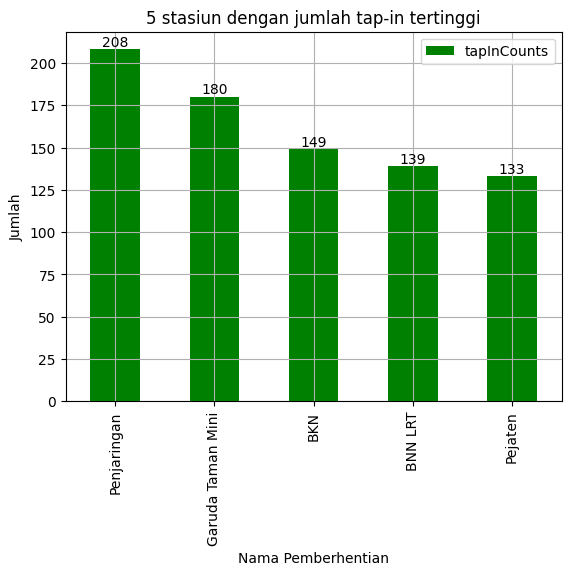

In [ ]:
t = tapIn_counts.sort_values(by='tapInCounts', ascending=False, ignore_index=True).head()
ax = t.plot(x='tapInStopsName', kind='bar', color='green')
# Menambahkan teks di atas setiap bar
for i, v in enumerate(t['tapInCounts']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.grid()
plt.xlabel('Nama Pemberhentian')
plt.ylabel('Jumlah')
plt.title('5 stasiun dengan jumlah tap-in tertinggi')
plt.show()

### **Koordinat halte terpadat**

In [ ]:
# buat DataFrame cor yang berisi informasi tentang lokasi stasiun tap-in dan tap-out, serta koordinat geografis (latitude dan longitude) dari stasiun
cor = df1[['corridorName','tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']].copy()
cor.drop_duplicates(inplace=True, ignore_index=True)
cor

,corridorName,tapInStopsName,tapInStopsLat,tapInStopsLon,tapOutStopsName,tapOutStopsLat,tapOutStopsLon
0,Matraman Baru - Ancol,Pal Putih,-6.184631,106.84402,Tegalan,-6.203101,106.85715
1,Stasiun Tebet - Karet via Patra Kuningan,Kemenkes 2,-6.228700,106.83302,Sampoerna Strategic,-6.217152,106.81892
2,Pantai Maju - Kota,Gg. Kunir II,-6.133132,106.81435,Simpang Kunir Kemukus,-6.133731,106.81475
3,Pulo Gebang - Pulo Gadung 2 via PIK,Taman Elok 1,-6.195743,106.93526,Raya Penggilingan,-6.183068,106.93194
4,Tanjung Priok - Pluit,Sunter Boulevard Barat,-6.149650,106.88900,Kali Besar Barat,-6.135355,106.81143
...,...,...,...,...,...,...,...
4190,Rawa Buaya - Rawa Kompeni,MTsN 37,-6.097910,106.70237,Puskesmas Kel. Kamal II,-6.100938,106.69786
4191,Kalimalang - Duren Sawit,Sbr. SMPN 252,-6.239289,106.94229,Jln. Swakarsa III Pondok Kelapa,-6.244759,106.94249
4192,Ragunan - MH Thamrin via Semanggi,Tosari,-6.196892,106.82309,SMK 57,-6.290967,106.82365
4193,Tanah Abang - Jembatan Lima,Museum Textile,-6.188656,106.80954,JPO Blok G,-6.188861,106.81135


In [ ]:
res = cor.merge(transcount, on=['tapInStopsName', 'tapOutStopsName']) # gabungkan DataFrame cor dengan DataFrame transcount berdasarkan stasiun tap-in dan tap-out.
res.sort_values(by='TransactionCount', ascending=False, ignore_index=True, inplace=True) # hasil penggabungan diurutkan berdasarkan jumlah transaksi secara menurun.
res

,corridorName,tapInStopsName,tapInStopsLat,tapInStopsLon,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,TransactionCount
0,Rusun Kapuk Muara - Penjaringan,Rusun Kapuk Muara,-6.135667,106.76299,Penjaringan,-6.126306,106.79203,108
1,Rusun Kapuk Muara - Penjaringan,Penjaringan,-6.126306,106.79203,Rusun Kapuk Muara,-6.135667,106.76299,103
2,Pinang Ranti - Pramuka,Garuda Taman Mini,-6.290154,106.88116,BKN,-6.257751,106.87000,92
3,Kampung Rambutan - Tanjung Priok,Tanah Merdeka Arah Timur,-6.307866,106.87389,Kampung Rambutan,-6.309885,106.88216,79
4,Kampung Rambutan - Bidara Cina,Tanah Merdeka Arah Timur,-6.307866,106.87389,Kampung Rambutan,-6.309885,106.88216,79
...,...,...,...,...,...,...,...,...
4190,Kampung Melayu - Pulo Gebang via BKT,RS Duren Sawit,-6.229777,106.90969,Cipinang Indah,-6.229430,106.89116,1
4191,Grogol - Pos Pengumben via Slipi,Sbr. Jln. Bhakti VII Palmerah,-6.193182,106.78365,Univ. Tarumanegara 2,-6.169747,106.78770,1
4192,Rusun Pondok Bambu - Walikota Jakarta Timur,Kodim 0505 1,-6.211958,106.94722,Flyover Radin Inten 1,-6.216112,106.92439,1
4193,Rawa Buaya - Rawa Kompeni,Sbr. Jln. Cambela Permai,-6.097476,106.69996,Klinik Darsa Medika Kamal,-6.099616,106.69901,1


In [ ]:
top10 = res.head(10)
top10

,corridorName,tapInStopsName,tapInStopsLat,tapInStopsLon,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,TransactionCount
0,Rusun Kapuk Muara - Penjaringan,Rusun Kapuk Muara,-6.135667,106.76299,Penjaringan,-6.126306,106.79203,108
1,Rusun Kapuk Muara - Penjaringan,Penjaringan,-6.126306,106.79203,Rusun Kapuk Muara,-6.135667,106.76299,103
2,Pinang Ranti - Pramuka,Garuda Taman Mini,-6.290154,106.88116,BKN,-6.257751,106.87000,92
3,Kampung Rambutan - Tanjung Priok,Tanah Merdeka Arah Timur,-6.307866,106.87389,Kampung Rambutan,-6.309885,106.88216,79
4,Kampung Rambutan - Bidara Cina,Tanah Merdeka Arah Timur,-6.307866,106.87389,Kampung Rambutan,-6.309885,106.88216,79
5,Kampung Rambutan - Juanda via Pasar Baru,Tanah Merdeka Arah Timur,-6.307866,106.87389,Kampung Rambutan,-6.309885,106.88216,79
6,Cibubur - BKN,Cibubur Junction,-6.368735,106.89366,BKN,-6.257751,106.87000,75
7,Harmoni - Jakarta International Stadium,Simpang Danau Sunter Utara Barat,-6.139853,106.85663,Jembatan Item,-6.130078,106.85492,74
8,Pinang Ranti - Pramuka,Garuda Taman Mini,-6.290154,106.88116,Pinang Ranti,-6.291075,106.88634,71
9,Pinang Ranti - Bundaran Senayan,Garuda Taman Mini,-6.290154,106.88116,Pinang Ranti,-6.291075,106.88634,71


In [ ]:
# Pusatkan peta pada koordinat tertentu (misalnya Jakarta)
center_latitude = -6.1751
center_longitude = 106.8272
zoom_level = 10
m = folium.Map(location=[center_latitude, center_longitude], zoom_start=zoom_level)

# Tambahkan marker pada setiap titik pemberhentian
for index, row in top10.iterrows():
    folium.Marker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        icon=folium.Icon(icon='cloud', color='green'),
        popup=row['tapInStopsName']
    ).add_to(m)

    folium.Marker(
        location=[row['tapOutStopsLat'], row['tapOutStopsLon']],
        icon=folium.Icon(icon='cloud', color='red'),
        popup=row['tapOutStopsName']
    ).add_to(m)

m

## **Data Preparation**

In [ ]:
df1

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay,tripDuration
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,1
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,Monday,1
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,Monday,1
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,Monday,1
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,18,19,Friday,1
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,21,22,Tuesday,1
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,10,13,Tuesday,3
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,19,20,Saturday,1


In [ ]:
# Mengganti angka 0.0 dengan nilai null hanya pada kolom payAmount
df1['payAmount'] = df1['payAmount'].replace(0.0, pd.NA)
df1 = df1.dropna(subset=['payAmount'])
df1

<ipython-input-34-523628551541>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['payAmount'] = df1['payAmount'].replace(0.0, pd.NA)


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay,tripDuration
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,Monday,1
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,Monday,1
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,Monday,1
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,Monday,1
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37888,KWQA944F9O89IN,6585885975007109,dki,Hardana Gunarto,F,1982,B14,Bekasi Barat - Kuningan,0.0,B00664P,...,Menara Duta,-6.208617,106.82986,14.0,2023-04-05 11:58:54,20000.0,9,11,Wednesday,2
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,18,19,Friday,1
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,21,22,Tuesday,1
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,10,13,Tuesday,3


In [ ]:
clv = df1[['corridorName', 'tapOutTime', 'payAmount','tapInStopsLat','tapInStopsLon','tapOutStopsLat','tapOutStopsLon']]
clv

,corridorName,tapOutTime,payAmount,tapInStopsLat,tapInStopsLon,tapOutStopsLat,tapOutStopsLon
0,Matraman Baru - Ancol,2023-04-03 06:00:53,3500.0,-6.184631,106.84402,-6.203101,106.85715
1,Stasiun Tebet - Karet via Patra Kuningan,2023-04-03 06:40:01,3500.0,-6.228700,106.83302,-6.217152,106.81892
2,Pantai Maju - Kota,2023-04-03 06:50:55,3500.0,-6.133132,106.81435,-6.133731,106.81475
3,Pulo Gebang - Pulo Gadung 2 via PIK,2023-04-03 06:28:16,3500.0,-6.195743,106.93526,-6.183068,106.93194
4,Tanjung Priok - Pluit,2023-04-03 06:57:03,3500.0,-6.149650,106.88900,-6.135355,106.81143
...,...,...,...,...,...,...,...
37888,Bekasi Barat - Kuningan,2023-04-05 11:58:54,20000.0,-6.221038,106.83189,-6.208617,106.82986
37895,Ragunan - MH Thamrin via Semanggi,2023-04-21 19:55:49,3500.0,-6.196892,106.82309,-6.290967,106.82365
37896,Pinang Ranti - Pramuka,2023-04-18 22:28:22,3500.0,-6.290154,106.88116,-6.291075,106.88634
37897,Cibubur - Balai Kota,2023-04-04 13:27:25,20000.0,-6.216247,106.81676,-6.370321,106.89628


In [ ]:
# RECENCY (R)
max_date = clv['tapOutTime'].max() # hitung tanggal terbaru dalam kolom 'tapOutTime'.
clv.loc[:, 'Recency'] = (max_date - clv['tapOutTime']).dt.days # hitung Recency (R) untuk setiap entri dalam DataFrame clv
clv

#FREQUENCY (F)
frequency = clv['corridorName'].value_counts().reset_index()
frequency.columns = ['corridorName', 'Frequency']
clv = clv.merge(frequency, on='corridorName')
clv

<ipython-input-36-98a8719b48e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clv.loc[:, 'Recency'] = (max_date - clv['tapOutTime']).dt.days # hitung Recency (R) untuk setiap entri dalam DataFrame clv


,corridorName,tapOutTime,payAmount,tapInStopsLat,tapInStopsLon,tapOutStopsLat,tapOutStopsLon,Recency,Frequency
0,Matraman Baru - Ancol,2023-04-03 06:00:53,3500.0,-6.184631,106.84402,-6.203101,106.85715,27,241
1,Matraman Baru - Ancol,2023-04-03 19:19:53,3500.0,-6.166063,106.83906,-6.133704,106.83164,27,241
2,Matraman Baru - Ancol,2023-04-03 18:06:41,3500.0,-6.208533,106.85929,-6.215744,106.86632,27,241
3,Matraman Baru - Ancol,2023-04-04 06:05:11,3500.0,-6.184631,106.84402,-6.203101,106.85715,26,241
4,Matraman Baru - Ancol,2023-04-04 06:07:11,3500.0,-6.208533,106.85929,-6.166063,106.83906,26,241
...,...,...,...,...,...,...,...,...,...
17442,Kampung Rambutan - Blok M,2023-04-29 07:08:54,3500.0,-6.277538,106.86917,-6.256423,106.85566,1,16
17443,Kampung Rambutan - Blok M,2023-04-30 15:36:11,3500.0,-6.253509,106.84135,-6.306068,106.88003,0,16
17444,Kampung Rambutan - Blok M,2023-04-30 11:40:45,3500.0,-6.255579,106.85422,-6.307866,106.87389,0,16
17445,Kampung Rambutan - Blok M,2023-04-23 12:16:28,3500.0,-6.238947,106.81624,-6.240500,106.79844,7,16


In [ ]:
clv.drop_duplicates(subset='corridorName', keep='first', inplace=True) # hapus baris yang duplikat berdasarkan kolom 'payCardName' dari DataFrame clv
clv.drop(columns=['tapOutTime'], inplace=True) # hapus kolom 'tapOutTime' dan 'payAmount' dari DataFrame clv
clv

,corridorName,payAmount,tapInStopsLat,tapInStopsLon,tapOutStopsLat,tapOutStopsLon,Recency,Frequency
0,Matraman Baru - Ancol,3500.0,-6.184631,106.84402,-6.203101,106.85715,27,241
241,Stasiun Tebet - Karet via Patra Kuningan,3500.0,-6.228700,106.83302,-6.217152,106.81892,27,165
406,Pantai Maju - Kota,3500.0,-6.133132,106.81435,-6.133731,106.81475,27,180
586,Pulo Gebang - Pulo Gadung 2 via PIK,3500.0,-6.195743,106.93526,-6.183068,106.93194,27,200
786,Tanjung Priok - Pluit,3500.0,-6.149650,106.88900,-6.135355,106.81143,27,232
...,...,...,...,...,...,...,...,...
17161,BSD Serpong - Fatmawati,20000.0,-6.308405,106.67367,-6.292589,106.79360,27,85
17246,Pantai Maju - Balai Kota,3500.0,-6.115644,106.77506,-6.092201,106.74388,27,112
17358,Gondangdia - Balai Kota,3500.0,-6.180673,106.82643,-6.182886,106.82851,21,37
17395,Senen - Tanah Abang,3500.0,-6.183203,106.82382,-6.176162,106.83987,21,36


In [ ]:
# Menggabungkan kolom latitude dan longitude
clv['tapInCoordinates'] = clv['tapInStopsLat'].astype(str) + ',' + clv['tapInStopsLon'].astype(str)
clv['tapOutCoordinates'] =clv['tapOutStopsLat'].astype(str) + ',' + clv['tapOutStopsLon'].astype(str)

# Menambahkan kolom baru ke dataset awal
df_combined = clv[['corridorName', 'payAmount', 'Recency', 'Frequency', 'tapInCoordinates', 'tapOutCoordinates']]

# Menampilkan dataset yang telah digabungkan
df_combined

,corridorName,payAmount,Recency,Frequency,tapInCoordinates,tapOutCoordinates
0,Matraman Baru - Ancol,3500.0,27,241,"-6.184631,106.84402","-6.203101,106.85715"
241,Stasiun Tebet - Karet via Patra Kuningan,3500.0,27,165,"-6.2287,106.83302","-6.217152,106.81892"
406,Pantai Maju - Kota,3500.0,27,180,"-6.133132,106.81435","-6.133731,106.81475"
586,Pulo Gebang - Pulo Gadung 2 via PIK,3500.0,27,200,"-6.195743,106.93526","-6.183068,106.93194"
786,Tanjung Priok - Pluit,3500.0,27,232,"-6.14965,106.889","-6.135355,106.81143"
...,...,...,...,...,...,...
17161,BSD Serpong - Fatmawati,20000.0,27,85,"-6.308405,106.67367","-6.292589,106.7936"
17246,Pantai Maju - Balai Kota,3500.0,27,112,"-6.115644,106.77506","-6.092201,106.74388"
17358,Gondangdia - Balai Kota,3500.0,21,37,"-6.180673,106.82643","-6.182886,106.82851"
17395,Senen - Tanah Abang,3500.0,21,36,"-6.183203,106.82382","-6.176162,106.83987"


In [ ]:
df_combined.columns

Index(['corridorName', 'payAmount', 'Recency', 'Frequency', 'tapInCoordinates',
       'tapOutCoordinates'],
      dtype='object')

In [ ]:
df_combined.rename(columns={'payAmount' : 'Value'}, inplace=True)
df_combined


<ipython-input-40-19601eb6b113>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined.rename(columns={'payAmount' : 'Value'}, inplace=True)


,corridorName,Value,Recency,Frequency,tapInCoordinates,tapOutCoordinates
0,Matraman Baru - Ancol,3500.0,27,241,"-6.184631,106.84402","-6.203101,106.85715"
241,Stasiun Tebet - Karet via Patra Kuningan,3500.0,27,165,"-6.2287,106.83302","-6.217152,106.81892"
406,Pantai Maju - Kota,3500.0,27,180,"-6.133132,106.81435","-6.133731,106.81475"
586,Pulo Gebang - Pulo Gadung 2 via PIK,3500.0,27,200,"-6.195743,106.93526","-6.183068,106.93194"
786,Tanjung Priok - Pluit,3500.0,27,232,"-6.14965,106.889","-6.135355,106.81143"
...,...,...,...,...,...,...
17161,BSD Serpong - Fatmawati,20000.0,27,85,"-6.308405,106.67367","-6.292589,106.7936"
17246,Pantai Maju - Balai Kota,3500.0,27,112,"-6.115644,106.77506","-6.092201,106.74388"
17358,Gondangdia - Balai Kota,3500.0,21,37,"-6.180673,106.82643","-6.182886,106.82851"
17395,Senen - Tanah Abang,3500.0,21,36,"-6.183203,106.82382","-6.176162,106.83987"


## **Modelling**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df = df_combined

In [ ]:
df.isnull().sum()

corridorName         0
Value                0
Recency              0
Frequency            0
tapInCoordinates     0
tapOutCoordinates    0
dtype: int64

In [ ]:
# Menghitung quartile
quartiles = df[['Recency', 'Frequency', 'Value']].quantile(q=[0.25, 0.5, 0.75])

In [ ]:
# Membuat fungsi untuk menerapkan quartile
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [ ]:
# Menerapkan fungsi quartile
df['R'] = df['Recency'].apply(RScore, args=('Recency', quartiles,))
df['F'] = df['Frequency'].apply(FMScore, args=('Frequency', quartiles,))
df['M'] = df['Value'].apply(FMScore, args=('Value', quartiles,))

# Menggabungkan nilai R, F, dan M untuk mendapatkan RFM score
df['RFM_Score'] = df['R'].map(str) + df['F'].map(str) + df['M'].map(str)

# Menggabungkan nilai R, F, dan M untuk mendapatkan RFM score
df['RFM_Score'] = df['R'].map(str) + df['F'].map(str) + df['M'].map(str)

<ipython-input-46-fae1a8b43039>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['R'] = df['Recency'].apply(RScore, args=('Recency', quartiles,))
<ipython-input-46-fae1a8b43039>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F'] = df['Frequency'].apply(FMScore, args=('Frequency', quartiles,))
<ipython-input-46-fae1a8b43039>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [ ]:
df.sort_values('RFM_Score', ascending=False).head(15)

,corridorName,Value,Recency,Frequency,tapInCoordinates,tapOutCoordinates,R,F,M,RFM_Score
1018,Cibubur - Balai Kota,20000.0,27,362,"-6.21601,106.81632","-6.210975,106.82059",4,4,4,444
1380,Bekasi Barat - Kuningan,20000.0,27,201,"-6.210363,106.83059","-6.245948,106.99247",4,4,4,444
0,Matraman Baru - Ancol,3500.0,27,241,"-6.184631,106.84402","-6.203101,106.85715",4,4,1,441
7252,Batusari - Grogol,3500.0,27,220,"-6.180482,106.78375","-6.194813,106.78213",4,4,1,441
4943,Harmoni - Jakarta International Stadium,3500.0,27,313,"-6.152181,106.85424","-6.16771,106.82819",4,4,1,441
5256,Ragunan - Blok M via Kemang,3500.0,27,268,"-6.288794,106.81818","-6.279439,106.81987",4,4,1,441
5631,Pinang Ranti - Pramuka,3500.0,27,220,"-6.290154,106.88116","-6.257751,106.87",4,4,1,441
5851,Pulo Gadung - Monas,3500.0,27,311,"-6.173925,106.85809","-6.16771,106.82819",4,4,1,441
6206,Puri Beta - Pancoran Barat,3500.0,27,213,"-6.23834,106.77752","-6.236104,106.75488",4,4,1,441
15734,Puri Beta 2 - Tendean,3500.0,27,225,"-6.241921,106.79077","-6.23755,106.76065",4,4,1,441


In [ ]:
# Mengambil kolom RFM Score untuk clustering
X = df[['R', 'F', 'M']]

In [ ]:
from sklearn.preprocessing import StandardScaler
# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

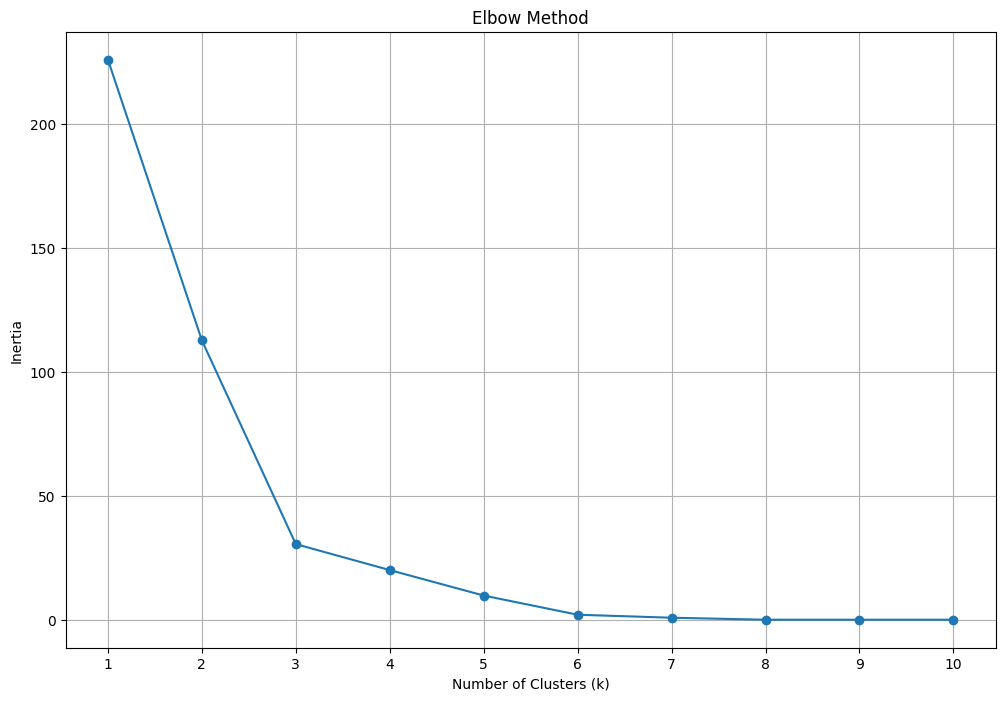

In [ ]:
# Mencari nilai K untuk digunkan pada culstering dengan menggunakan Elbow method
# Inisialisasi list untuk menyimpan nilai inersia
inertia_values = []

# Range nilai k yang akan dievaluasi
k_values = range(1, 11)

# Melakukan clustering dengan K-means untuk setiap nilai k dan menghitung inersia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plotting elbow method
plt.figure(figsize=(12, 8))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
# Menentukan jumlah cluster yang diinginkan
n_clusters = 3

# Melakukan clustering dengan KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_scaled)

# Menambahkan kolom Cluster ke DataFrame
df['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Menampilkan hasil clustering
print(df[['corridorName', 'RFM_Score', 'Cluster']])

                                   corridorName RFM_Score  Cluster
0                         Matraman Baru - Ancol       441        2
241    Stasiun Tebet - Karet via Patra Kuningan       431        2
406                          Pantai Maju - Kota       431        2
586         Pulo Gebang - Pulo Gadung 2 via PIK       431        2
786                       Tanjung Priok - Pluit       441        2
...                                         ...       ...      ...
17161                   BSD Serpong - Fatmawati       414        1
17246                  Pantai Maju - Balai Kota       421        0
17358                   Gondangdia - Balai Kota       411        0
17395                       Senen - Tanah Abang       411        0
17431                 Kampung Rambutan - Blok M       411        0

[113 rows x 3 columns]


In [ ]:
num_rows_len = len(df['Cluster'])
print(f"Jumlah baris (menggunakan len): {num_rows_len}")

Jumlah baris (menggunakan len): 113


In [ ]:
df

,corridorName,Value,Recency,Frequency,tapInCoordinates,tapOutCoordinates,R,F,M,RFM_Score,Cluster
0,Matraman Baru - Ancol,3500.0,27,241,"-6.184631,106.84402","-6.203101,106.85715",4,4,1,441,2
241,Stasiun Tebet - Karet via Patra Kuningan,3500.0,27,165,"-6.2287,106.83302","-6.217152,106.81892",4,3,1,431,2
406,Pantai Maju - Kota,3500.0,27,180,"-6.133132,106.81435","-6.133731,106.81475",4,3,1,431,2
586,Pulo Gebang - Pulo Gadung 2 via PIK,3500.0,27,200,"-6.195743,106.93526","-6.183068,106.93194",4,3,1,431,2
786,Tanjung Priok - Pluit,3500.0,27,232,"-6.14965,106.889","-6.135355,106.81143",4,4,1,441,2
...,...,...,...,...,...,...,...,...,...,...,...
17161,BSD Serpong - Fatmawati,20000.0,27,85,"-6.308405,106.67367","-6.292589,106.7936",4,1,4,414,1
17246,Pantai Maju - Balai Kota,3500.0,27,112,"-6.115644,106.77506","-6.092201,106.74388",4,2,1,421,0
17358,Gondangdia - Balai Kota,3500.0,21,37,"-6.180673,106.82643","-6.182886,106.82851",4,1,1,411,0
17395,Senen - Tanah Abang,3500.0,21,36,"-6.183203,106.82382","-6.176162,106.83987",4,1,1,411,0


In [ ]:
df1.drop_duplicates(subset='corridorName', keep='first', inplace=True)

<ipython-input-55-7fd2b3644e52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(subset='corridorName', keep='first', inplace=True)


In [ ]:
# Menggabungkan kedua DataFrame berdasarkan corridorName
merged_df = pd.merge(df1, df, on='corridorName')

# Menampilkan hasil
print(merged_df)

            transID            payCardID payCardBank            payCardName  \
0    EIIW227B8L34VB      180062659848800      emoney         Bajragin Usada   
1    LGXO740D2N47GZ     4885331907664776         dki           Gandi Widodo   
2    DJWR385V2U57TO     4996225095064169         dki          Emong Wastuti   
3    JTUZ800U7C86EH         639099174703       flazz           Surya Wacana   
4    VMLO535V7F95NJ         570928206772       flazz        Embuh Mardhiyah   
..              ...                  ...         ...                    ...   
108  RWSE957B8T61BQ         639000296355       flazz         Catur Najmudin   
109  IQJQ140C2E15MY     4528824477684144         dki            Vino Sinaga   
110  NGUZ280W0Z24RU  4845152371767796654      brizzi          Endah Puspita   
111  FMHV284R4I59DP     2719590630002838         dki      Adhiarja Winarsih   
112  OTLQ523M9T67TL        4367294005037      online  Dr. Wirda Hardiansyah   

    payCardSex  payCardBirthDate corridorID  \
0   

In [ ]:
merged_df.drop(columns=['tapInStopsLat','tapInStopsLon','tapOutStopsLon','tapOutStopsLat'], inplace=True)

In [ ]:
merged_df.to_csv('dataset.csv', index=False, encoding='utf-8')

In [ ]:
# Memfilter data berdasarkan Cluster
cluster_0 = df[df['Cluster'] == 0][['corridorName', 'RFM_Score', 'Cluster']]
cluster_1 = df[df['Cluster'] == 1][['corridorName', 'RFM_Score', 'Cluster']]
cluster_2 = df[df['Cluster'] == 2][['corridorName', 'RFM_Score', 'Cluster']]


In [ ]:
cluster_0.sort_values('RFM_Score', ascending=False)

,corridorName,RFM_Score,Cluster
2244,Ciputat - Kampung Rambutan,421,0
9980,Puri Beta - Dukuh Atas,421,0
13595,Ragunan - MH Thamrin via Semanggi,421,0
13479,Pinang Ranti - Pulo Gadung,421,0
13346,Ragunan - MH Thamrin via Kuningan,421,0
13222,Tanjung Priok - Senen via Taman BMW,421,0
12795,Blok M - Pasar Minggu,421,0
2584,Kebayoran Lama - Jelambar,421,0
11576,Pasar Minggu - Velbak,421,0
11454,Kampung Melayu - Ragunan,421,0


In [ ]:
cluster_1.sort_values('RFM_Score', ascending=False)

,corridorName,RFM_Score,Cluster
1018,Cibubur - Balai Kota,444,1
1380,Bekasi Barat - Kuningan,444,1
9249,Palem Semi - Bundaran Senayan,434,1
12634,Cinere - Bundaran Senayan,434,1
14370,Bintaro - Fatmawati,424,1
15528,Bekasi Barat - Blok M,424,1
16610,Cibubur Junction - Blok M,424,1
15959,Cinere - Kuningan,414,1
16870,Cibubur - Kuningan,414,1
17161,BSD Serpong - Fatmawati,414,1


In [ ]:
cluster_2.sort_values('RFM_Score', ascending=False)

,corridorName,RFM_Score,Cluster
0,Matraman Baru - Ancol,441,2
7963,Kebayoran Lama - Tanah Abang,441,2
5631,Pinang Ranti - Pramuka,441,2
5851,Pulo Gadung - Monas,441,2
6206,Puri Beta - Pancoran Barat,441,2
6554,Pasar Minggu - Tanah Abang,441,2
7252,Batusari - Grogol,441,2
7472,PGC 2 - Tanjung Priok,441,2
8858,PGC - Juanda,441,2
4943,Harmoni - Jakarta International Stadium,441,2


###### **hasil cluster dengan nilai RFM**

In [ ]:
# Analisis hasil clustering
cluster_summary = df.groupby('Cluster').agg({
    'corridorName': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Value': 'mean'
}).rename(columns={
    'corridorName': 'Count',
    'Recency': 'Mean Recency',
    'Frequency': 'Mean Frequency',
    'Value': 'Mean Monetary'
})

print("\nSummary of Clusters:")
print(cluster_summary)


Summary of Clusters:
         Count  Mean Recency  Mean Frequency Mean Monetary
Cluster                                                   
0           52     26.653846      101.307692        3500.0
1           10     27.000000      153.300000       20000.0
2           51     27.000000      208.745098        3500.0


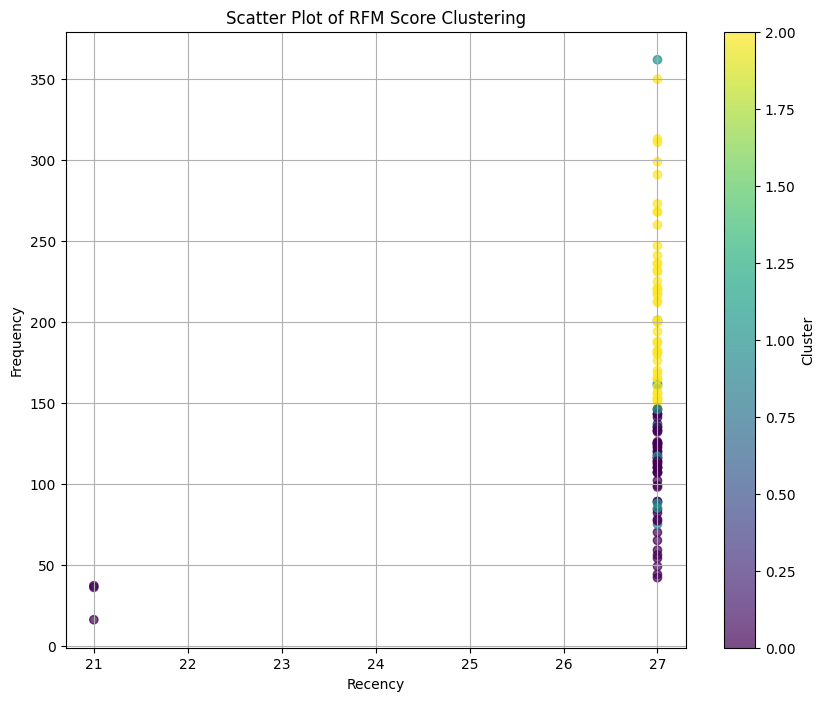

In [ ]:
import matplotlib.pyplot as plt

# Membuat scatter plot dari hasil clustering
plt.figure(figsize=(10, 8))
plt.scatter(df['Recency'], df['Frequency'], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Scatter Plot of RFM Score Clustering')
plt.grid(True)
plt.show()


## **Evaluation**

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Menghitung Davies-Bouldin Index
davies_bouldin_idx = davies_bouldin_score(X_scaled, df['Cluster'])
print(f"Davies-Bouldin Index: {davies_bouldin_idx}")

# Menghitung Calinski-Harabasz Index
calinski_harabasz_idx = calinski_harabasz_score(X_scaled, df['Cluster'])
print(f"Calinski-Harabasz Index: {calinski_harabasz_idx}")

Silhouette Score: 0.7213558599773023
Davies-Bouldin Index: 0.45652157292008516
Calinski-Harabasz Index: 352.3334730237741


# **Deployment**

In [ ]:
# Mengambil data dari DataFrame sebelumnya (df) yang sudah berisi informasi klaster
cluster_summary = df.groupby('Cluster').agg({
    'Value': 'mean'
}).rename(columns={'Value': 'Mean Monetary'})

In [ ]:
# Fungsi untuk menentukan nama promosi berdasarkan klaster
def determine_promo(cluster):
    if cluster == 0:
        return "Weekend Deal"
    elif cluster == 1:
        return "Starpoint VIP"
    else:
        return "Super Saver"


In [ ]:
# Menambahkan kolom 'Promo' ke dalam DataFrame dengan menggunakan fungsi determine_promo
merged_df['Promo'] = merged_df['Cluster'].apply(determine_promo)

In [ ]:
merged_df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,Recency,Frequency,tapInCoordinates,tapOutCoordinates,R,F,M,RFM_Score,Cluster,Promo
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,27,241,"-6.184631,106.84402","-6.203101,106.85715",4,4,1,441,2,Super Saver
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,27,165,"-6.2287,106.83302","-6.217152,106.81892",4,3,1,431,2,Super Saver
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,27,180,"-6.133132,106.81435","-6.133731,106.81475",4,3,1,431,2,Super Saver
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,27,200,"-6.195743,106.93526","-6.183068,106.93194",4,3,1,431,2,Super Saver
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,27,232,"-6.14965,106.889","-6.135355,106.81143",4,4,1,441,2,Super Saver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,RWSE957B8T61BQ,639000296355,flazz,Catur Najmudin,F,2012,S12,BSD Serpong - Fatmawati,0.0,B05852P,...,27,85,"-6.308405,106.67367","-6.292589,106.7936",4,1,4,414,1,Starpoint VIP
109,IQJQ140C2E15MY,4528824477684144,dki,Vino Sinaga,M,2000,1A,Pantai Maju - Balai Kota,1.0,B05253P,...,27,112,"-6.115644,106.77506","-6.092201,106.74388",4,2,1,421,0,Weekend Deal
110,NGUZ280W0Z24RU,4845152371767796654,brizzi,Endah Puspita,F,2004,2Q,Gondangdia - Balai Kota,1.0,B02755P,...,21,37,"-6.180673,106.82643","-6.182886,106.82851",4,1,1,411,0,Weekend Deal
111,FMHV284R4I59DP,2719590630002838,dki,Adhiarja Winarsih,F,1993,1R,Senen - Tanah Abang,1.0,B01968P,...,21,36,"-6.183203,106.82382","-6.176162,106.83987",4,1,1,411,0,Weekend Deal


In [ ]:
merged_df.to_csv('dataset1.csv', index=False, encoding='utf-8')